In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:

df['zipcode'] = df['zipcode'].astype('str')



In [6]:
dg = pd.read_csv("df_cleared.csv")

In [7]:
df = df.drop(['date'], axis=1)


In [8]:
df_dum = pd.get_dummies(df)

In [9]:
df_dum.corrwith(df['price'])

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
zipcode_98001   -0.092179
zipcode_98002   -0.080300
zipcode_98003   -0.076761
zipcode_98004    0.271131
zipcode_98005    0.065114
zipcode_98006    0.133695
zipcode_98007    0.017000
zipcode_98008    0.033076
zipcode_98010   -0.021621
zipcode_98011   -0.012927
zipcode_98014   -0.017478
zipcode_98019   -0.029577
zipcode_98022   -0.063943
zipcode_98023   -0.106093
zipcode_98024    0.006756
zipcode_98027    0.029201
zipcode_98028   -0.024350
zipcode_98029    0.024270
zipcode_98030   -0.072737
zipcode_9803

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [11]:
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])


In [12]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())



In [13]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())


In [14]:
my_pipe_lasso.fit(X_train, y_train)

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+14, tolerance: 2.201e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['id', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [15]:
my_pipe_lasso.score(X_test, y_test)

0.8706816345086238

In [16]:
y_pred = my_pipe_lasso.predict(X_train)


In [17]:
residual = (y_train - y_pred).abs().sort_values()

In [18]:
type(residual)

pandas.core.series.Series

In [19]:
to_drop = residual[residual > 500000].index

In [20]:
df_cleaned = df.drop(to_drop)

In [21]:
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
df_cleaned.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
df_cleaned.condition

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21471, dtype: int64

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


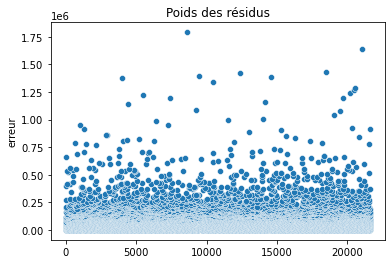

In [24]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [25]:
residual[residual.index == 15870]

15870    18498.473697
Name: price, dtype: float64

In [26]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [27]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [28]:
my_pipe_lasso.fit(X_train, y_train)

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.106e+13, tolerance: 1.764e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['id', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [29]:
my_pipe_lasso.score(X_test, y_test)

0.8863146683269002

In [30]:
X_test.to_csv("X_test")

In [31]:
X_train.to_csv("X_train")